In [1]:
import os
import pandas as pd
from newsapi import NewsApiClient

%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key = os.getenv("news_api")


In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q='bitcoin',
    language='en',
    sort_by = 'relevancy'
    )
print(f"Total articles about Bitcoins : {bitcoin_news['totalResults']}")

TypeError: expected string or bytes-like object

In [6]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q='ethereum AND NOT bitcoin',
    language='en'
)
print(f"Total articles about Ethereum : {ethereum_news['totalResults']}")

Total articles about Ethereum : 253


In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
            
        bitcoin_sentiment.append({
            "text" : text,
            "Compound": compound,
            "Positive" : pos,
            "Negative" : neg,
            "Neutral" : neu
        })    
    except AttributeError:
        pass
bitcoin_df = pd.DataFrame(bitcoin_sentiment)
columns = ["Compound","Negative","Neutral","Positive","text"]
bitcoin_df = bitcoin_df[columns]
bitcoin_df.head() 
        

,Compound,Negative,Neutral,Positive,text
0,-0.2944,0.078,0.847,0.074,Bitcoin is going through a remarkably bad day....
1,0.0000,0.000,1.000,0.000,After launching two cryptocurrency-oriented sm...
2,0.0000,0.000,1.000,0.000,If youve been following cryptocurrency news fo...
3,-0.5106,0.168,0.730,0.103,Indias Supreme Court on Wednesday overturned c...
4,0.5070,0.000,0.932,0.068,Our robot colleague Satoshi Nakaboto writes ab...


In [8]:
# Create the ethereum sentiment scores DataFrame
etherum_sentiment = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
            
        etherum_sentiment.append({
            "text" : text,
            "Compound": compound,
            "Positive" : pos,
            "Negative" : neg,
            "Neutral" : neu
        })    
    except AttributeError:
        pass
etherum_df = pd.DataFrame(etherum_sentiment)
columns = ["Compound","Negative","Neutral","Positive","text"]
etherum_df = etherum_df[columns]
etherum_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.000,1.000,0.000,If a player picks up an item in an online vide...
1,0.3182,0.066,0.822,0.112,When it comes to celebrities shilling shady in...
2,0.7506,0.041,0.762,0.197,Orchid\r\nNo matter how much we trust any part...
3,0.8955,0.000,0.792,0.208,The author is Camila Russo and the subtitle is...
4,0.4939,0.000,0.928,0.072,The world of storage is changing rapidly. We h...


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.353384,0.020632,0.905053,0.074316
std,0.351346,0.043071,0.059955,0.036477
min,-0.510600,0.000000,0.730000,0.000000
25%,0.207750,0.000000,0.871500,0.066500
50%,0.507000,0.000000,0.932000,0.068000
75%,0.507000,0.021000,0.932000,0.079500
max,0.789300,0.168000,1.000000,0.137000


In [10]:
# Describe the Ethereum Sentiment
etherum_df.describe()

,Compound,Negative,Neutral,Positive
count,18.000000,18.000000,18.000000,18.000000
mean,0.340439,0.018556,0.894111,0.087389
std,0.395993,0.029157,0.076634,0.076962
min,-0.380400,0.000000,0.762000,0.000000
25%,0.000000,0.000000,0.837500,0.000000
50%,0.339700,0.000000,0.908000,0.092000
75%,0.716475,0.039250,0.954000,0.138750
max,0.895500,0.089000,1.000000,0.212000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has %08 positive mean score while Bitcoin has %07 positive

Q: Which coin had the highest compound score?

A: Ethereum has %89 compound score while Bitcoin has %78 compound score. 

Q. Which coin had the highest positive score?

A: Ethereum has %21 positive score while Bitcoin has %13

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
stemmer = PorterStemmer()

lemmatizer = WordNetLemmatizer()
sw = set(stopwords.words('english'))


In [12]:
# Expand the default stopwords list if necessary
sw_addon = ["ha", "every", "youve"]

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words

    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
  
    
    
    return tokens


In [14]:
# Create a new tokens column for bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.tail()

,Compound,Negative,Neutral,Positive,text,tokens
14,0.5070,0.000,0.933,0.067,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
15,0.1725,0.052,0.882,0.066,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
16,0.7893,0.000,0.863,0.137,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
17,0.2911,0.042,0.893,0.065,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
18,0.5070,0.000,0.932,0.068,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [15]:
# Create a new tokens column for ethereum
etherum_df["tokens"] = etherum_df.text.apply(tokenizer)
etherum_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.000,1.000,0.000,If a player picks up an item in an online vide...,"[player, pick, item, online, video, game, owns..."
1,0.3182,0.066,0.822,0.112,When it comes to celebrities shilling shady in...,"[come, celebrity, shilling, shady, initial, co..."
2,0.7506,0.041,0.762,0.197,Orchid\r\nNo matter how much we trust any part...,"[orchidno, matter, much, trust, particular, vi..."
3,0.8955,0.000,0.792,0.208,The author is Camila Russo and the subtitle is...,"[author, camila, russo, subtitle, army, crypto..."
4,0.4939,0.000,0.928,0.072,The world of storage is changing rapidly. We h...,"[world, storage, changing, rapidly, exciting, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
n = 2
# First method to generate N-grams where N=2
grams1 = ngrams(tokenizer(bitcoin_df.text.str.cat()),n)
Counter(grams1).most_common(10)

[(('satoshi', 'nakaboto'), 26),
 (('charsour', 'robot'), 13),
 (('robot', 'colleague'), 13),
 (('colleague', 'satoshi'), 13),
 (('nakaboto', 'writes'), 13),
 (('writes', 'bitcoin'), 13),
 (('fucking', 'daywelcome'), 13),
 (('daywelcome', 'another'), 13),
 (('another', 'edition'), 13),
 (('edition', 'bitcoin'), 13)]

In [18]:
# Generate the Ethereum N-grams where N=2
grams2 = ngrams(tokenizer(etherum_df.text.str.cat()),n)
Counter(grams2).most_common(10)

[(('player', 'pick'), 2),
 (('pick', 'item'), 2),
 (('item', 'online'), 2),
 (('online', 'video'), 2),
 (('video', 'game'), 2),
 (('game', 'owns'), 2),
 (('owns', 'item'), 2),
 (('item', 'player'), 2),
 (('player', 'company'), 2),
 (('company', 'made'), 2)]

In [19]:
# the second method to generate N_grams

In [20]:
# Created loop and append every tokenized words to a list for bitcoin dataframe
all_bitcoin_words = []
for token in bitcoin_df['tokens']:
    for word in token:
        all_bitcoin_words.append(word)

In [21]:
# Created loop and append every tokenized words to a list for etherum dataframe
all_etherum_words = []
for token in etherum_df['tokens']:
    for word in token:
        all_etherum_words.append(word)


In [22]:
bitcoin_sent = []
for sent in bitcoin_df['text']:
    bitcoin_sent.append(sent)

In [23]:
etherum_sent = []
for sent in etherum_df['text']:
    etherum_sent.append(sent)

In [24]:
# Generate the Bitcoin N-grams where N=2
def bigram_counter(corpus):
    # Combine all articles in sorpus into one large string
    big_string = '.'.join(corpus)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n)
    top_10 = dict(Counter(bigrams).most_common(10))
    # return the resulte to a DataFrame
    return pd.DataFrame(list(top_10.items()), columns=['Bigram','Count'])


In [25]:
bigram_counter(bitcoin_sent)

,Bigram,Count
0,"(satoshi, nakaboto)",26
1,"(charsour, robot)",13
2,"(robot, colleague)",13
3,"(colleague, satoshi)",13
4,"(nakaboto, writes)",13
5,"(writes, bitcoin)",13
6,"(fucking, daywelcome)",13
7,"(daywelcome, another)",13
8,"(another, edition)",13
9,"(edition, bitcoin)",13


In [26]:
bigram_counter(etherum_sent)

,Bigram,Count
0,"(player, pick)",2
1,"(pick, item)",2
2,"(item, online)",2
3,"(online, video)",2
4,"(video, game)",2
5,"(game, owns)",2
6,"(owns, item)",2
7,"(item, player)",2
8,"(player, company)",2
9,"(company, made)",2


In [27]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [28]:
# Get the top 10 words for Bitcoin
all_bitcoin = tokenizer(bitcoin_df.text.str.cat())
token_count(all_bitcoin,10)

[('bitcoin', 41),
 ('satoshi', 26),
 ('nakaboto', 26),
 ('going', 14),
 ('hour', 14),
 ('btc', 14),
 ('past', 14),
 ('today', 14),
 ('charsour', 13),
 ('robot', 13)]

In [29]:
# Get the top 10 words for Ethereum
all_etherum = tokenizer(etherum_df.text.str.cat())
token_count(all_etherum,10)

[('blockchain', 8),
 ('new', 7),
 ('player', 6),
 ('item', 6),
 ('company', 6),
 ('ethereum', 6),
 ('first', 5),
 ('nreal', 4),
 ('may', 3),
 ('network', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

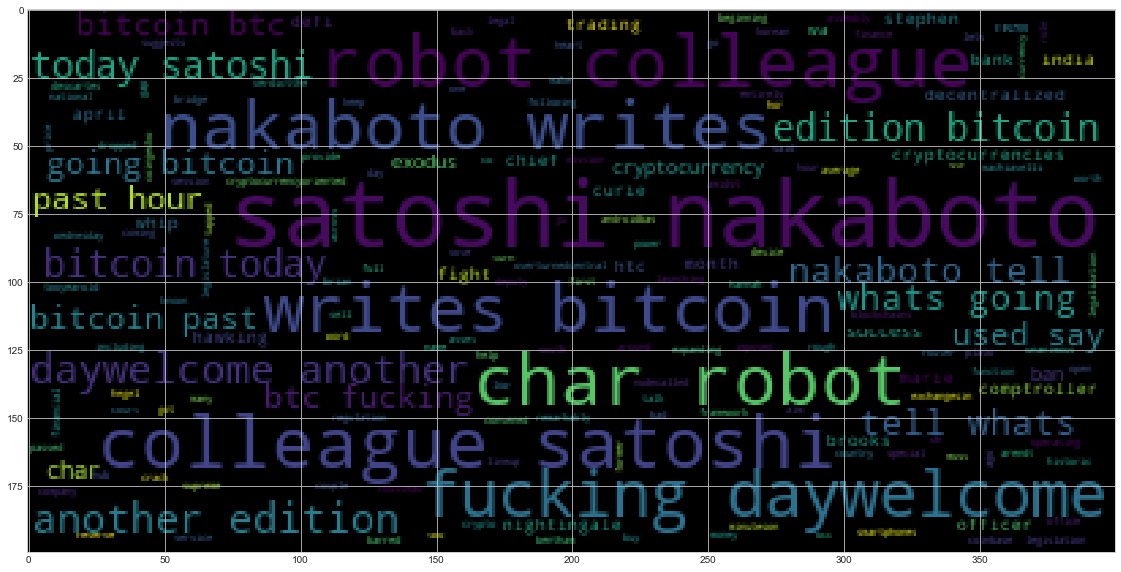

In [31]:
# Generate the Bitcoin word cloud
big_string = ' '.join(all_bitcoin_words)
wc = WordCloud().generate(big_string)
plt.imshow(wc)

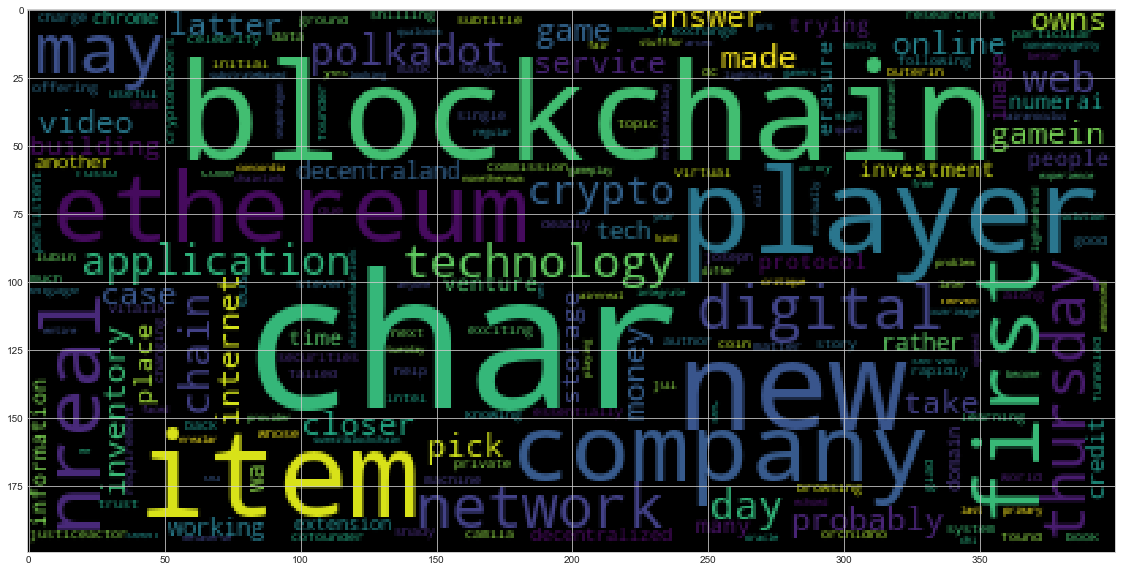

In [32]:
# Generate the Ethereum word cloud
big_string = ' '.join(all_etherum_words)
wc = WordCloud().generate(big_string)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [33]:
import spacy
from spacy import displacy

In [34]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [35]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [36]:
# Concatenate all of the bitcoin text together
all_bitcoin_text_df = bitcoin_df.text.str.cat()


In [37]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(all_bitcoin_text_df)
# Add a title to the document
bitcoin_ner.user_data['title'] = "Bitcoin NER"

In [38]:
# Render the visualization
displacy.render(bitcoin_ner, style='ent')

In [39]:
# List all Entities
for ent in bitcoin_ner.ents:
    print(ent, ent.label_)

Bitcoin GPE
A couple of hours ago TIME
BTC ORG
15% PERCENT
just 20 minutes TIME
CoinGecko PRODUCT
1 CARDINAL
BTC ORG
around $7,250 MONEY
two CARDINAL
HTC Exodus 1 PRODUCT
Exodus WORK_OF_ART
5 CARDINAL
Bitcoin GPE
HTC Exodus 5 PRODUCT
Android-bas GPE
the past few months DATE
one CARDINAL
DeFi PERSON
DeFi PERSON
Supreme Court ORG
Wednesday DATE
two-year-old DATE
The Reserve Bank of India ORG
April 2018 DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Descartes PERSON
Brian Brooks PERSON
first ORDINAL
the Office of the Comptroller of the Currency ORG
April 1, 2020 DATE
Brooks ORG
OCC ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Plato PERSON
Success ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Hannah Arendt PERSON
South Korean National Assembly ORG
today DATE
Satosh

---

## Ethereum NER

In [40]:
# Concatenate all of the bitcoin text together
all_ethereum_text_df = etherum_df.text.str.cat()


In [41]:
# Run the NER processor on all of the text
ethereum_ner = nlp(all_ethereum_text_df)

# Add a title to the document
ethereum_ner.user_data['title'] = "Ethereum NER"

In [42]:
# Render the visualization
displacy.render(ethereum_ner, style='ent')

In [43]:
# List all Entities
for ent in ethereum_ner.ents:
    print(ent, ent.label_)

the Securities and Exchange Commission ORG
Steven Seagal PERSON
Thursday DATE
SEC ORG
2018 DATE
Camila Russo PERSON
Building the Next Internet with Ethereum WORK_OF_ART
Vitalik Buterin and PERSON
Jul PERSON
Intel ORG
Lubin PERSON
Co-Founder ORG
Founder ORG
Consensys ORG
Concordia Summit
 ORG
Blockchain GPE
the last few years DATE
Thursday DATE
Decentraland LOC
first ORDINAL
Chainlink ORG
first ORDINAL
Substrate ORG
Polkadot ORG
Polkadot ORG
Tuesday DATE
Chi Xu PERSON
NrealClay NORP
LightNreal Light 5 PRODUCT
Tech PERSON
Nakamoto, Szabo ORG
Finney PERSON
Buterin PERSON
modern-day DATE
blockchain GPE
Unikrn ORG
Rah PERSON
ConsenSys ORG
Microsoft ORG
Numerai ORG
Thursdays DATE
Domains PERSON
3.0 CARDINAL
+1981 ORG
first ORDINAL
$39.7 million MONEY
FAT Brands ORG
Fatburger PRODUCT
Morningstar PERSON
first ORDINAL
6.90% PERCENT
Saturday DATE
19.46% PERCENT
Friday DATE
EOS ORG
the day DATE
1.9773 MONEY
the day DATE
2.1385 MONEY
first ORDINAL
